## Importing libraries

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
comments_df = pd.read_csv(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\UScomments.csv", on_bad_lines = "skip")

In [83]:
comments_df.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [84]:
comments_df.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [85]:
comments_df.dropna(inplace = True)

In [86]:
comments_df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [87]:
##pip install textblob

## 1) Performing Sentiment Analysis

In [88]:
from textblob import TextBlob

In [89]:
comments_df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [90]:
TextBlob("trending 😉").sentiment.polarity

0.0

In [91]:
comments_df.shape

(691374, 4)

#### Took a `sample` Dataframe because we have near about `700000` rows, so compute speed will be more.

In [92]:
sample_df = comments_df.loc[0:100001]

In [93]:
sample_df.shape

(100000, 4)

In [94]:
polarity = []

for comments in sample_df["comment_text"]:
    try:
        polarity.append(round((TextBlob(comments).sentiment.polarity), 1))
    except:
        polarity.append(0)

In [95]:
sample_df["polarity"] = polarity

In [96]:
sample_df.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [97]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 100001
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      100000 non-null  object 
 1   comment_text  100000 non-null  object 
 2   likes         100000 non-null  object 
 3   replies       100000 non-null  object 
 4   polarity      100000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [98]:
def conversion(col):
    if (col >= 0.4):
        return 1
    elif (col >= 0) and (col < 0.4):
        return 0
    else:
        return -1 
    
sample_df["polarity"] = sample_df["polarity"].apply(conversion).astype("float")

#### Changed to (-1, 0, 1) to keep in unique.

In [99]:
sample_df["polarity"].unique()

array([ 0.,  1., -1.])

<Axes: xlabel='polarity'>

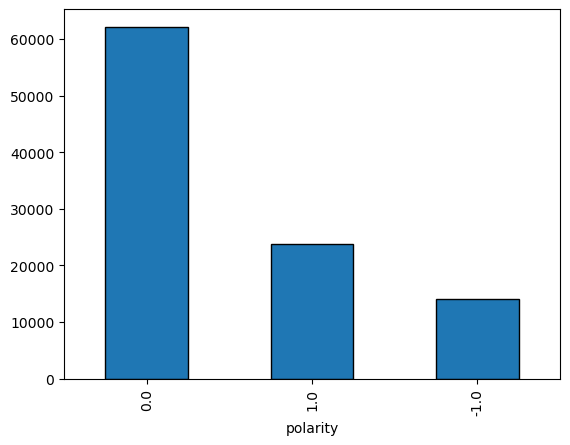

In [100]:
sample_df["polarity"].value_counts().plot(kind = "bar", ec = "black")

#### This graph is only for a sample of the Data we have

#### `Polarity` is a range by which we can say whether the comment is `negative` or `neutral` or `positive` i.e [-1,0,1], basically `Sentiment` of the Comments that we have.

## 2) Performing WordCloud Analysis

In [101]:
positive_comments = sample_df[sample_df["polarity"] == 1]

In [102]:
positive_comments.polarity.unique()

array([1.])

In [103]:
negative_comments = sample_df[sample_df["polarity"] == -1]

In [104]:
negative_comments.polarity.unique()

array([-1.])

In [105]:
#pip install wordcloud

In [106]:
from wordcloud import WordCloud, STOPWORDS

In [107]:
#set(STOPWORDS) --> to see the unique STOPWORDS present in WordCloud

In [108]:
total_positive_comments = ' '.join(positive_comments["comment_text"])

In [109]:
#total_positive_comments

In [110]:
words_positive = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)

(-0.5, 399.5, 199.5, -0.5)

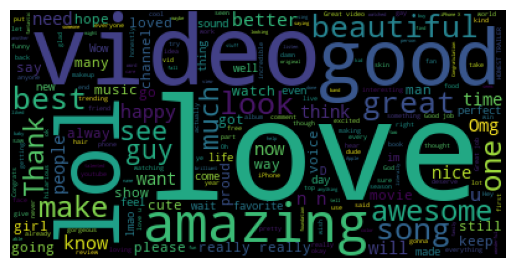

In [111]:
plt.imshow(words_positive)
plt.axis("off")

#### Most number of `positive` words are from `bigger` to `smaller`.

In [112]:
total_negative_comments = ' '.join(negative_comments["comment_text"])

In [113]:
#total_negative_comments

In [114]:
words_negative = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)

(-0.5, 399.5, 199.5, -0.5)

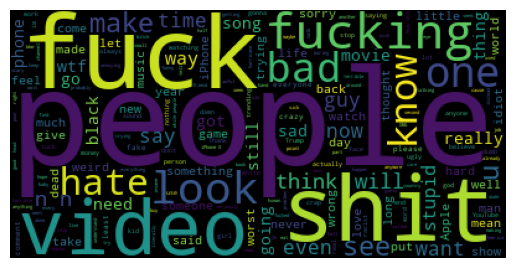

In [115]:
plt.imshow(words_negative)
plt.axis("off")

#### Most number of `negative` words are from `bigger` to `smaller`.

## 3) Emoji Analysis

In [116]:
#!pip install emoji==2.2.0

In [117]:
import emoji

In [118]:
emoji.__version__

'2.2.0'

In [119]:
sample_df.comment_text.head(6)

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
5                              #1 on trending AYYEEEEE
Name: comment_text, dtype: object

In [120]:
total_emojis = []

for comment in sample_df["comment_text"].dropna():     # if any null values present drop them
    for char in comment:
        if char in emoji.EMOJI_DATA:
            total_emojis.append(char)

In [121]:
total_emojis[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [122]:
from collections import Counter

In [123]:
Counter(total_emojis).most_common(10)

[('😂', 5427),
 ('❤', 4549),
 ('😍', 4167),
 ('😬', 2078),
 ('😭', 1131),
 ('💕', 1021),
 ('🔥', 935),
 ('👏', 917),
 ('😘', 762),
 ('👍', 740)]

In [124]:
Counter(total_emojis).most_common(10)[2][1]

4167

In [125]:
emojis = [Counter(total_emojis).most_common(10)[i][0] for i in range(10)]

In [126]:
emojis

['😂', '❤', '😍', '😬', '😭', '💕', '🔥', '👏', '😘', '👍']

In [127]:
frequency = [Counter(total_emojis).most_common(10)[i][1] for i in range(10)]

In [128]:
frequency

[5427, 4549, 4167, 2078, 1131, 1021, 935, 917, 762, 740]

In [175]:
# !pip install -U kaleido

In [131]:
import plotly.express as px

In [132]:
fig = px.bar(x = emojis, y = frequency, labels={"x":"emojis", "y":"frequency"})

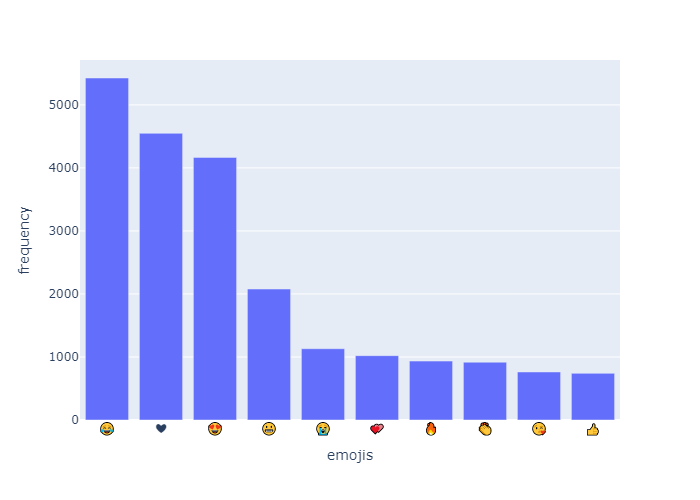

In [177]:
fig.show("png")

#### `Emojis` representation i.e top `10` most common emojis and their count.

## 4) Collecting Data of YouTube: Data Collection

In [134]:
import os

In [135]:
files = os.listdir(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data")

In [136]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [137]:
files_csv = [file for file in files if ".csv" in file]

In [138]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [139]:
df = pd.DataFrame()
path = r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data"

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file, encoding="iso-8859-1", on_bad_lines = "skip")

    df = pd.concat([df, current_df], ignore_index=True)

In [140]:
df.shape

(375942, 16)

In [141]:
df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...


#### Removing Duplicates

In [142]:
df[df.duplicated()].shape

(36417, 16)

In [143]:
df = df.drop_duplicates()
df.shape

(339525, 16)

## 5) Analysing the Most `liked` category ?

In [144]:
df.category_id.unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

#### We took every json file for mapping because each json file has `category_id` with `category_name`.
#### and `category_id = 29: 'Nonprofits & Activism'` was not present in some `.json` files, so we import each file.

In [145]:
json_df1 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/CA_category_id.json")
json_df2 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/DE_category_id.json")
json_df3 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/FR_category_id.json")
json_df4 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/GB_category_id.json")
json_df5 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/IN_category_id.json")
json_df6 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/JP_category_id.json")
json_df7 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/KR_category_id.json")
json_df8 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/MX_category_id.json")
json_df9 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/RU_category_id.json")
json_df10 = pd.read_json(r"D:\Udemy Projects Data analysis\Youtube-Text-Data-Analysis\data\additional_data/US_category_id.json")
json_df1.head(6)

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
5,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [146]:
json_df1['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"ld9biNPKjAjgjV7EZ4EKeEGrhao/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [147]:
json_df4['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [148]:
cat_dict = {}

for item in json_df1["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df2["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df3["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df4["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df5["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df6["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df7["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df8["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df9["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]
for item in json_df10["items"].values:
    cat_dict[int(item["id"])] = item["snippet"]["title"]

In [149]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers',
 29: 'Nonprofits & Activism'}

In [150]:
df["category_name"] = df["category_id"].map(cat_dict)

In [151]:
df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics


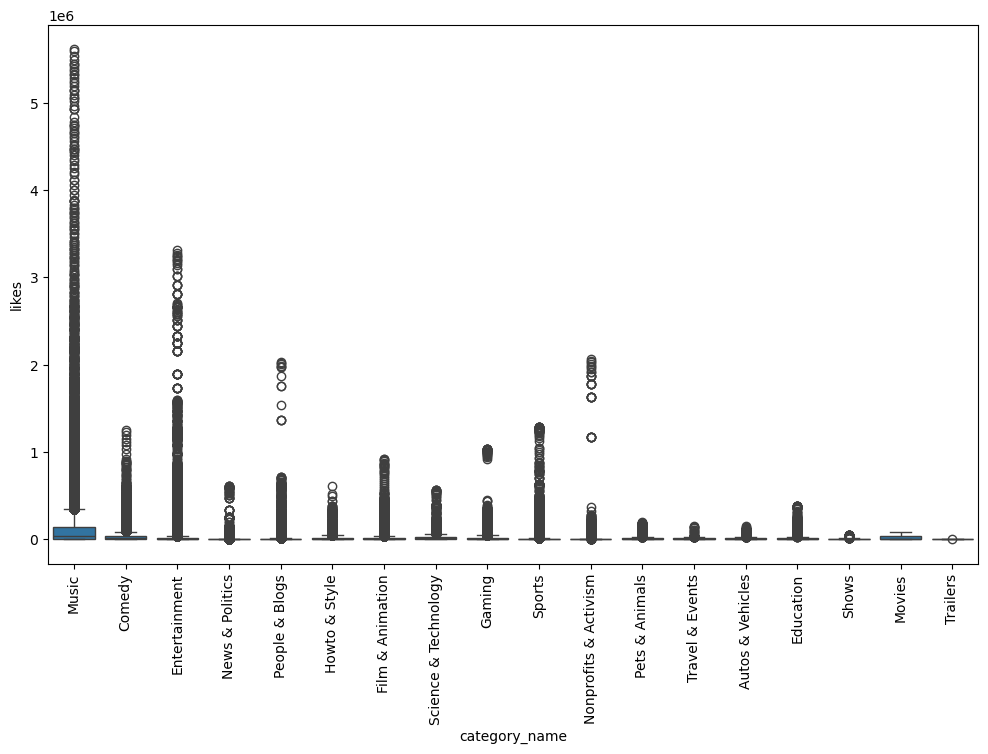

In [152]:
plt.figure(figsize = (12,7))
sns.boxplot(data = df, x = "category_name", y = "likes")
plt.xticks(rotation = "vertical")
plt.show()

#### We are using `sns.boxplot` becoz `likes` can have extreme values and it is not considered `outliers` as it is a `Youtube Data`. So, to see which `category` has performed well we want to see the `extreme` values too.

## 6) Is the audience engaged or not?

In [153]:
df["like_rate"] = (df["likes"]/df["views"])*100
df["dislike_rate"] = (df["dislikes"]/df["views"])*100
df["comment_count_rate"] = (df["comment_count"]/df["views"])*100

In [154]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

#### Let's see what the `views` vs `likes` graph looks like.

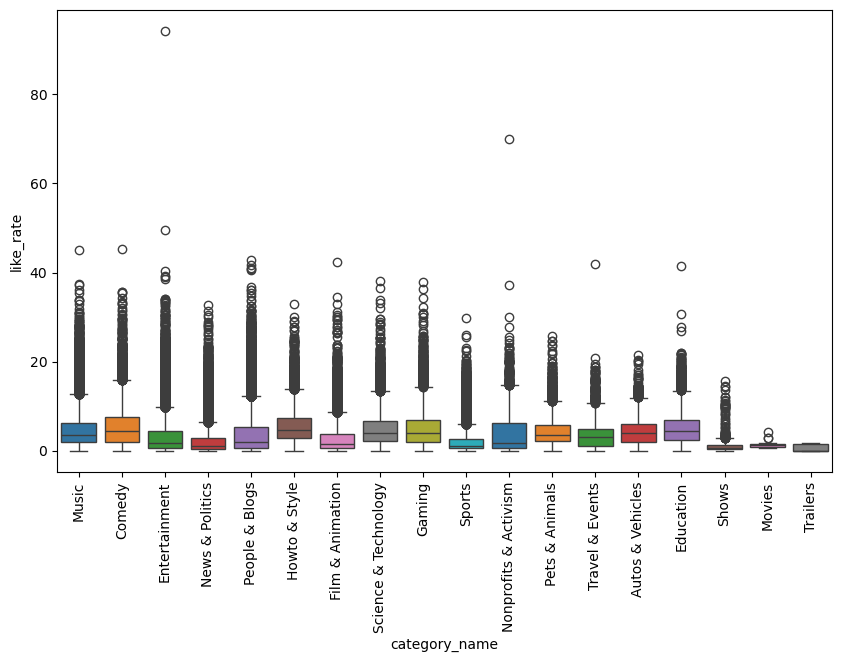

In [155]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "category_name", y = "like_rate", palette = sns.color_palette())
plt.xticks(rotation = "vertical")
plt.show()

In [156]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

#### Let's see whether `views` and `likes` have a `Linear Relationship` or not.

<Axes: xlabel='views', ylabel='likes'>

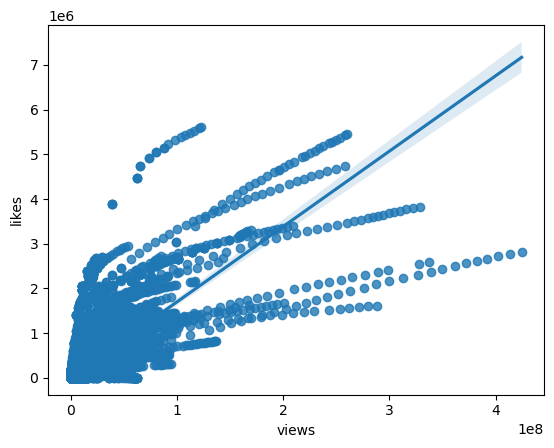

In [157]:
sns.regplot(data = df, x = "views", y = "likes")

#### As we can see it has a `Linear Relation` to each other.

In [158]:
df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

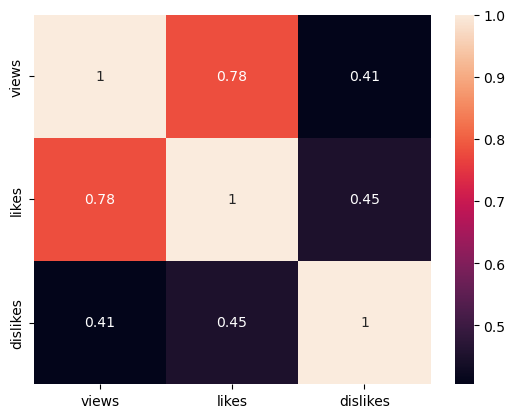

In [159]:
sns.heatmap(df[['views', 'likes', 'dislikes']].corr(), annot = True)

#### As we can see that `views` w.r.t `likes` have a `Positive Co-relation` of `0.78`.
#### and `views` w.r.t `dislikes` has a `0.41` shows that it is not `highly co-related`.

## 7)  Which channels have the largest number of trending videos?

In [160]:
df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,âº Follow for News! - https://twitter.com/KEE...,News & Politics,7.922049,0.352218,0.927160


In [161]:
ctv = df.groupby(["channel_title"]).size().sort_values(ascending=False).reset_index().rename(columns = {0:"total_videos"})

In [162]:
import plotly.express as px

## 8) Does Punctuations in title have any relation with views, likes, dislikes, comment_count features?

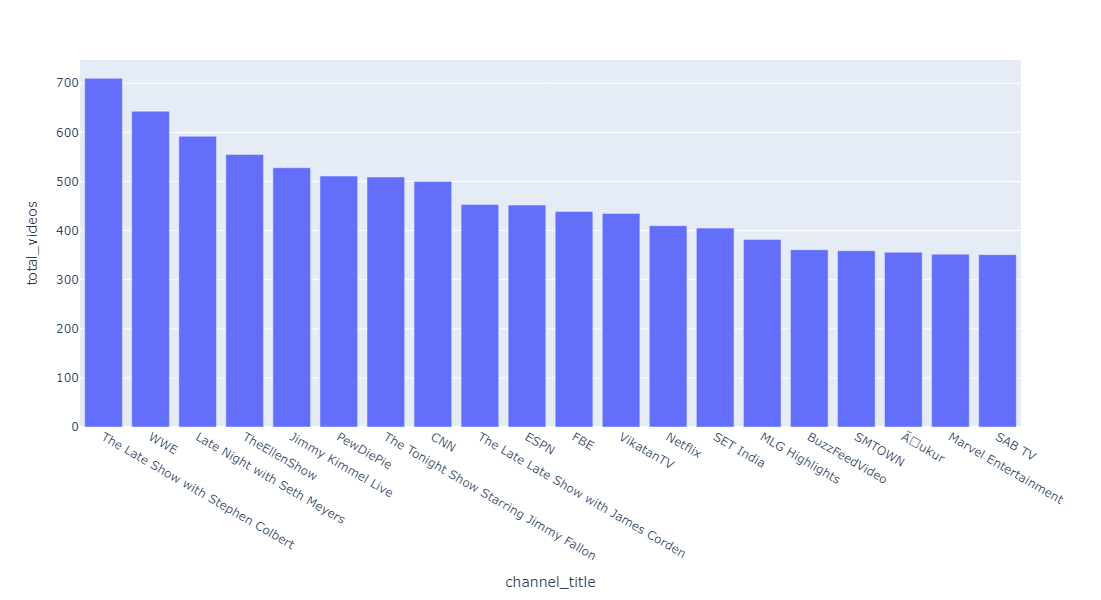

In [163]:
px.bar(data_frame = ctv[0:20], x = "channel_title", y = "total_videos", width = 1000, height = 600)

In [164]:
df['title']

0               Eminem - Walk On Water (Audio) ft. BeyoncÃ©
1                             PLUSH - Bad Unboxing Fan Mail
2         Racist Superman | Rudy Mancuso, King Bach & Le...
3                                  I Dare You: GOING BALD!?
4               Ed Sheeran - Perfect (Official Music Video)
                                ...                        
375936    BTS Plays With Puppies While Answering Fan Que...
375938                           True Facts : Ant Mutualism
375939    I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...
375940                  How Black Panther Should Have Ended
375941    Official Call of DutyÂ®: Black Ops 4 âÂ Mult...
Name: title, Length: 339525, dtype: object

In [165]:
import string

In [166]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [167]:
len([char for char in df['title'][0] if char in string.punctuation])

4

In [168]:
def punctuation_count(text):
    return len([char for char in text if char in string.punctuation])

In [169]:
df["punc_count"] = df["title"].apply(punctuation_count)

In [170]:
df["punc_count"]

0         4
1         1
2         3
3         3
4         3
         ..
375936    0
375938    1
375939    3
375940    0
375941    1
Name: punc_count, Length: 339525, dtype: int64

### a) Views

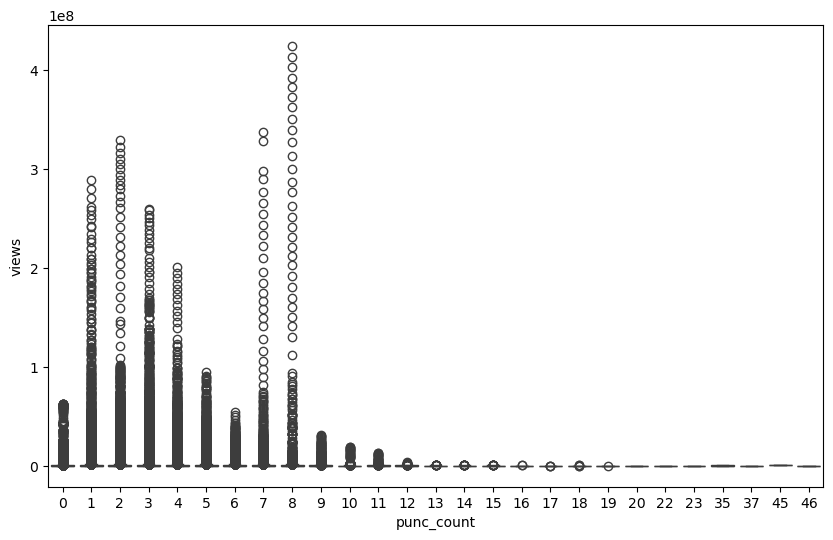

In [171]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "punc_count", y = "views", palette = sns.color_palette())
plt.show()

#### When our `punc_count` is `1|2|3` there are many datapoints that have more `views` whereas
#### in `7|8` we have fewer datapoints with max views. 
#### It means when `punc_count` is between `1 or 2 or 3` we can have more views.

### b) Likes

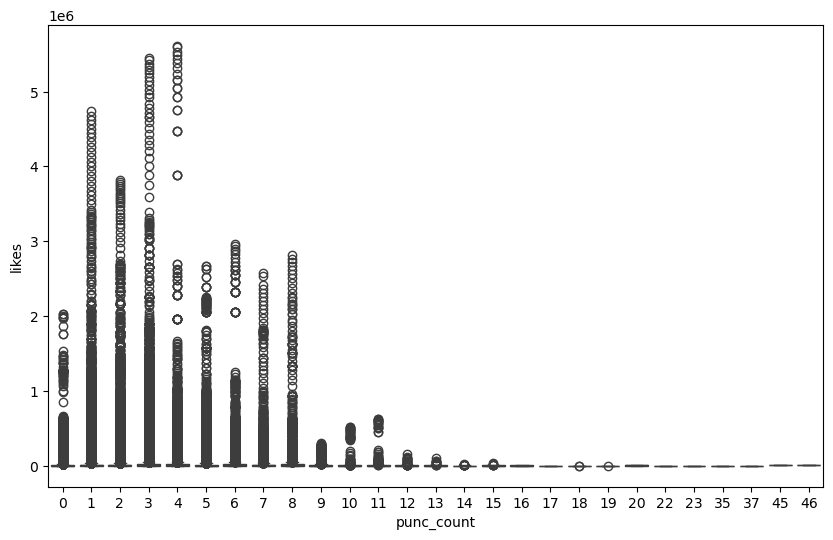

In [172]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "punc_count", y = "likes", palette = sns.color_palette())
plt.show()

#### As we can see `likes` increase for many of the punc_counts, 
#### so in general we can say that `fewer punc_count` can lead to `more likes` on a particular video.

### c) Dislikes

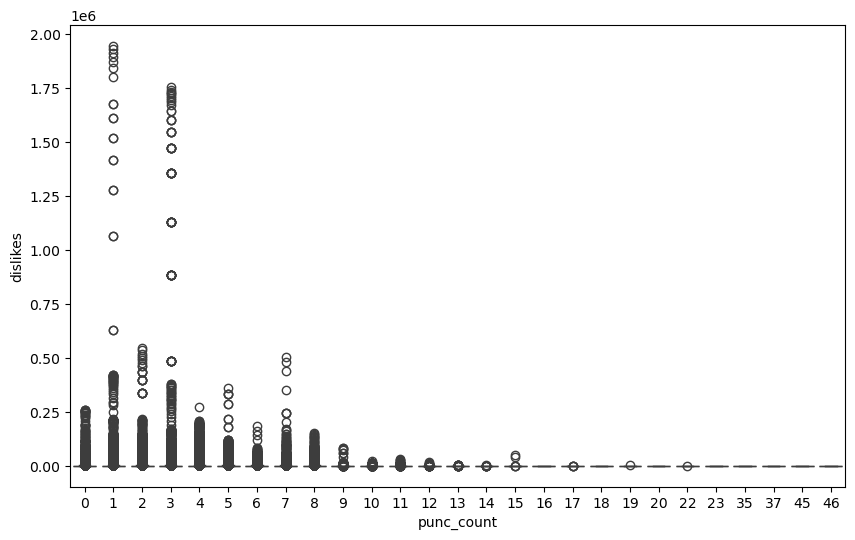

In [173]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "punc_count", y = "dislikes", palette = sns.color_palette())
plt.show()

#### In case of `dislikes`, some datapoints have dislikes when we have a `fewer punc_count`,
#### So we cannot say `100%` whether there is any relationship or not.

### d) Comment_count

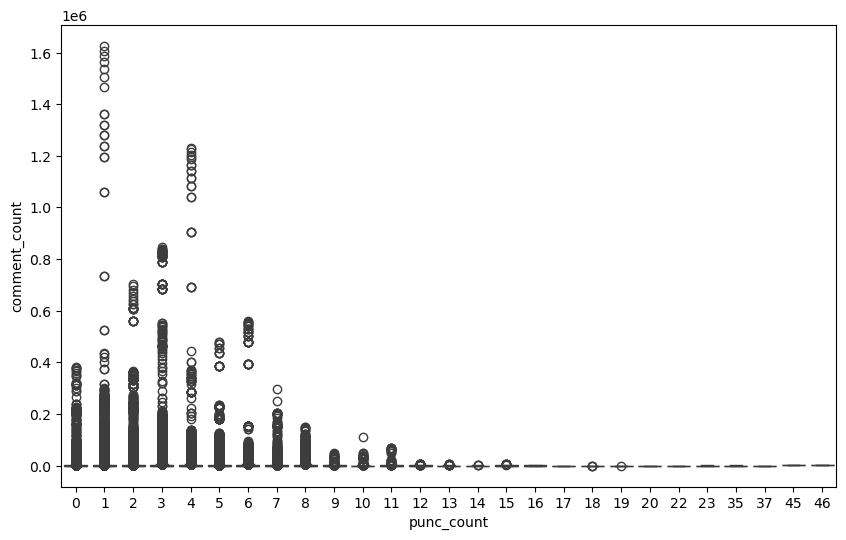

In [174]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = "punc_count", y = "comment_count", palette = sns.color_palette())
plt.show()

#### In case of `comment_count`, `it is the same as dislikes` (previous graph) since
#### in a very `few videos` where the punc_counts is `between 1 and 4`, the comment_count is `high`.